## 3.5 Método de Newton

El método de Newton-Raphson se basa en encontrar la raíz de la función $f(x)$

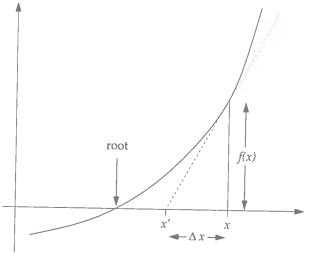

Consideramos un $x$ y trazamos la pendiente en esa posición, la cual corta en $x'$. Luego, la derivada de $f(x)$:
$f'(x) = \frac{f(x)}{\Delta x}$

Es decir:
$x' = x - \frac{f(x)}{f'(x)}$

Entonces, basta conocer la derivada para y repetir el proceso las veces que sea necesario. Si la función tiene más de una raíz, el $x$ que tomemos será cercano a la raíz que se encuentre, de modo que podemos tomar otro $x$ para encontrar la otra raíz.

Si hacemos una expansión en Taylor: $f(x^{*}) = f(x) + (x^{*}-x)f'(x) + \frac{1}{2}(x^{*}-x)^{2}f''(x)$.

Como $x^{*}$ es raíz, $f(x^{*}) = 0$ y si $x^{*} = x + \epsilon$, $x^{*} = x' + \epsilon '$:

$\epsilon ' = \left[\frac{-f''(x)}{2f'(x)}\right]\epsilon^{2}$

O sea, el método de Newton es de convergencia cuadrática, converge rápido.

#### Ejemplo 6.4: Inversa de la tangente hiperbólica

$u = tanh(x)$  $\rightarrow$ $tanh(x) - u = 0$

$\frac{d}{dx}tanh(x) = \frac{1}{cosh^{2}(x)}$

$x' = x - (tanh(x) -u)cosh^{2}(x)$

In [1]:
from pylab import*
from math import tanh, cosh

In [2]:
prec1 = 1e-12
def arctanh(u):
    x = 0.0
    delta = 1.0
    while abs(delta)>prec1:
        delta = (tanh(x) - u)*(cosh(x))**(2)
        x = x- delta
    return x
print(arctanh(0.5))

0.5493061443340548


In [3]:
from numpy import*
from pylab import plot, show

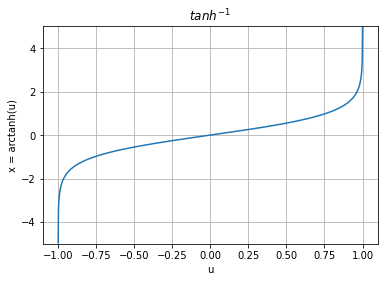

In [4]:
upoints = linspace(-0.9999, 0.9999, 1000)
xpoints = []
for u in upoints:
    xpoints.append(arctanh(u))
plot(upoints, xpoints)
grid()
title(r'$tanh^{-1}$')
xlabel('u')
ylabel('x = arctanh(u)')
ylim(-5,5 )
show()

El método de Newton tienes dos desventajas: Primero, conocer la derivada de la función.
Segundo, no siempre converge, si $f'(x)$ es muy pequeño, error puede ser muy grande, lo cual puede haacer que nos alejemos de la raíz en lugar de acercarnos.

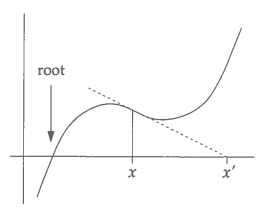

## 3.6 Método de la Secante

Si no tenemos una fórmula analítica de la derivada, no podríamos usar tan fácilmente el método de Newton. El método de la secante propone calcular la derivada numéricamente. Para ello, usaremos los puntos $x$ y $x'$. Comenzamos con los puntos $x_{1}$ y $x_{2}$. Entonces:

$f'(x_{2}) \simeq \frac{f(x_{2}) - f(x_{1})}{x_{2}-x_{1}} \$

y como:

$x' = x - \frac{f(x)}{f'(x)}$

Entonces:

$x_{3} = x_{2} - f(x_{2})\frac{x_{2} - x_{1}}{f(x_{2}) - f(x_{1})}$

In [5]:
prec2 = 1e-6

In [6]:
def Secante(x1, x2, prec, f):
    delta = 1.0
    while abs(delta)>prec:
        delta = (f(x2)*(x2-x1))/(f(x2)-f(x1))
        x2 = x2 - delta
    return x2

#### Pregunta 3

Hay un punto máguco entre la Tierra y la Luna, llamado el punto de Lagrange $L_{1}$, en el cual un satélite orbita la Tierra en perfecta sincronía con la Luna, manteniéndose siempre entre los dos. Esto funciona porque la atracción hacia dentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene el satélite en su órbita.

a) La distancia $r$ desde el centro de la Tierra al punto $L_{1}$ satisface:

$\frac{GM}{r^{2}} - \frac{Gm}{(R-r)^{2}} = \omega^{2}r$

b) La ecuación anterior es una polinomio de grado 5 en $r$. Escribir un programa para resolver la distancia $r$ de la Tierra al punto $L_{1}$.

In [7]:
G = 6.674*(10**-11)
#G = 1
#M = 1
M = 5.974*(10**24)
#m = 1
m = 7.348*(10**22)
#R = 1
R = 3.844*(10**8)
#omega = 1
omega = 2.662*(10**-6)

In [8]:
def puntoLag(r):
    return G*M/(omega**2*r**3) - G*m/(((R-r)**2)*omega**2*r) - 1

In [27]:
prueba = linspace(1, R, 10)
plot(prueba, puntoLag(prueba))
#ylim(1e8, 3.5e8)
show()
#Consideramos 1.5*(10**8) y 2.0*(10**8)

In [10]:
A = Secante(1.5e8, 2e8 , prec2, puntoLag)
print('La distancia L1 respecto de la Tierra es:',A,'m')

La distancia L1 respecto de la Tierra es: 326045071.66535425 m


In [11]:
B = puntoLag(A)
print(B)

4.085620730620576e-14


## 3.6 Método de Newton para dos o más variables

$\left( \frac{V_{1} - V_{+}}{R_{1}}\right) + \frac{V_{1}}{R_{2}} + I_{0}\left(e^{(V_{1} - V_{2}/V_{T})} - 1 \right) = 0$

$\frac{V_{+} - V_{2}}{R_{3}} - \frac{V_{2}}{R_{4}} + I_{0}\left(e^{(V_{1} - V_{2})/V_{T}} - 1\right) = 0$

In [39]:
Vm = 5
R1 = 1e3
R2 = 4e3
R3 = 3e3
R4 = 2e3
I0 = 3e-9
VT = 5e-2
prec3 = 1e-10

In [40]:
def funciones(fs):
    f1 = ((fs[0] - Vm)/R1) + (fs[0]/R2) + I0*(exp((fs[0] - fs[1])/VT) - 1)
    f2 = ((Vm - fs[1])/R3) - (fs[1]/R4) + I0*(exp((fs[0] - fs[1])/VT) - 1)
    return array([f1, f2])

In [41]:
def j(f):
    j00 = (1/R1) + (1/R2) +  I0/VT*exp((f[0] - f[1])/VT)
    j01 = -I0/VT*exp((f[0] - f[1])/VT)
    j10 = I0/VT*exp((f[0] - f[1])/VT)
    j11 = (-1/R3) - (1/R4) - (I0/VT*exp((f[0] - f[1])/VT))
    return array([[j00, j01],[j10, j11]])

In [51]:
x1 = array([-4,200])
delta = solve(j(x1), funciones(x1))
while abs(delta[0])>prec3 or abs(delta[1]) >prec3:
    delta = solve(j(x1), funciones(x1))
    x1 = x1 - delta
print(x1)

[3.44695462 2.82956807]
